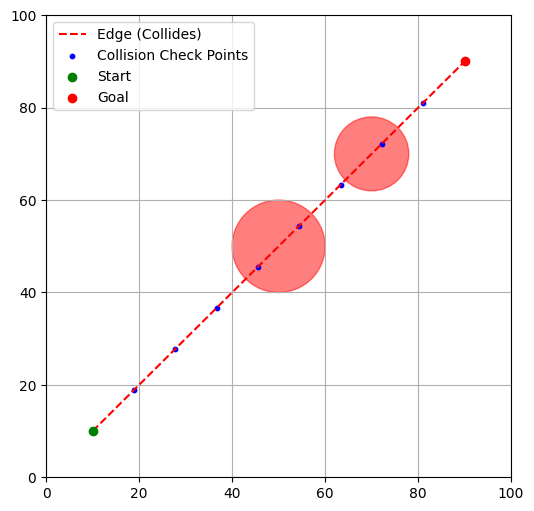

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Example setup
start = np.array([10, 10])
goal = np.array([90, 90])
obstacles = [(50, 50, 10), (70, 70, 8)]  # (x, y, radius)

# Create a function to check for collision with obstacles
def check_collision(a, b, obstacles):
    x0, y0 = a
    x1, y1 = b
    line = np.linspace(a, b, num=100)
    for (ox, oy, r) in obstacles:
        for (px, py) in line:
            if np.hypot(px - ox, py - oy) < r:
                return True
    return False

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Plot obstacles
for ox, oy, r in obstacles:
    circle = patches.Circle((ox, oy), r, color='red', alpha=0.5)
    ax.add_patch(circle)

# Draw the edge and check for collision
if check_collision(start, goal, obstacles):
    ax.plot([start[0], goal[0]], [start[1], goal[1]], 'r--', label='Edge (Collides)')
else:
    ax.plot([start[0], goal[0]], [start[1], goal[1]], 'g-', label='Edge (Safe)')

# Show intermediate points for collision check
line = np.linspace(start, goal, num=10)
ax.scatter(line[:, 0], line[:, 1], color='blue', s=10, label='Collision Check Points')

# Plot the nodes
ax.scatter(start[0], start[1], color='green', label='Start', zorder=5)
ax.scatter(goal[0], goal[1], color='red', label='Goal', zorder=5)

ax.legend()
plt.grid(True)
plt.show()

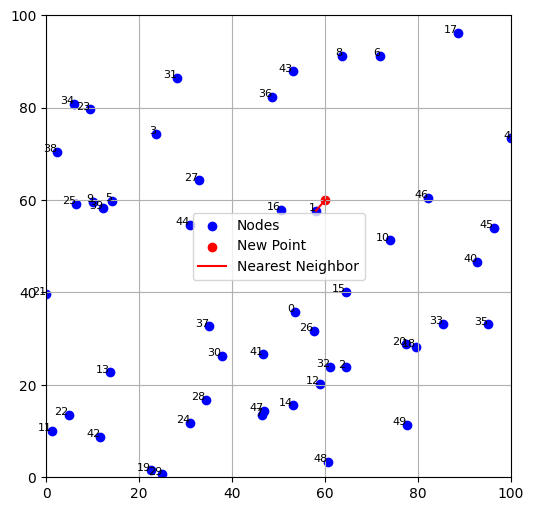

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import cKDTree

# Create random nodes and build KDTree
nodes = np.random.rand(50, 2) * 100
kdtree = cKDTree(nodes)

# Find nearest neighbor for a new point
new_point = np.array([60, 60])
_, idx = kdtree.query(new_point)

# Plot the nodes and the KDTree structure
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(nodes[:, 0], nodes[:, 1], color='blue', label='Nodes')
ax.scatter(new_point[0], new_point[1], color='red', label='New Point')
ax.plot([new_point[0], nodes[idx, 0]], [new_point[1], nodes[idx, 1]], 'r-', label='Nearest Neighbor')

# Plot the KDTree
for i, point in enumerate(nodes):
    ax.text(point[0], point[1], str(i), fontsize=8, ha='right', color='black')

ax.legend()
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()


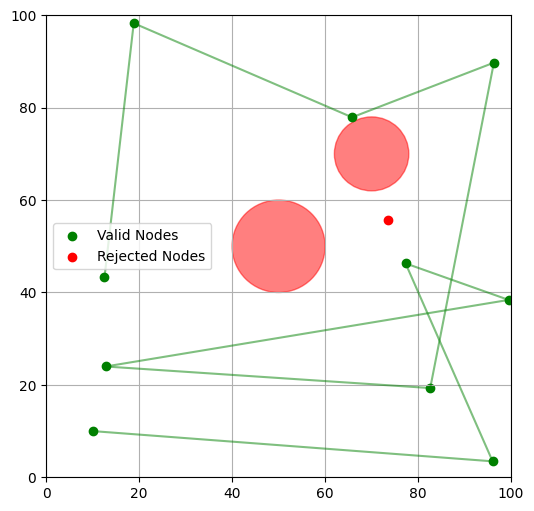

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Example setup
start = np.array([10, 10])
goal = np.array([90, 90])
obstacles = [(50, 50, 10), (70, 70, 8)]
expanded_nodes = [start]
valid_nodes = [start]
rejected_nodes = []

# Create a function to check for collision with obstacles
def check_collision(a, b, obstacles):
    line = np.linspace(a, b, num=10)
    for (ox, oy, r) in obstacles:
        for (px, py) in line:
            if np.hypot(px - ox, py - oy) < r:
                return True
    return False

# Simulate node expansion
for i in range(10):
    new_node = np.random.rand(2) * 100
    if check_collision(expanded_nodes[-1], new_node, obstacles):
        rejected_nodes.append(new_node)  # Append rejected node
    else:
        valid_nodes.append(new_node)  # Append valid node
    expanded_nodes.append(new_node)

# Convert lists to numpy arrays for plotting
valid_nodes = np.array(valid_nodes)
rejected_nodes = np.array(rejected_nodes)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Plot obstacles
for ox, oy, r in obstacles:
    circle = patches.Circle((ox, oy), r, color='red', alpha=0.5)
    ax.add_patch(circle)

# Plot nodes and expansions
ax.scatter(valid_nodes[:, 0], valid_nodes[:, 1], color='green', label='Valid Nodes')
ax.scatter(rejected_nodes[:, 0], rejected_nodes[:, 1], color='red', label='Rejected Nodes')

# Plot the edges for valid nodes
for i in range(1, len(valid_nodes)):
    ax.plot([valid_nodes[i-1, 0], valid_nodes[i, 0]], [valid_nodes[i-1, 1], valid_nodes[i, 1]], 'g-', alpha=0.5)

# Plot the edges for rejected nodes
for i in range(1, len(rejected_nodes)):
    ax.plot([expanded_nodes[i-1, 0], rejected_nodes[i, 0]], [expanded_nodes[i-1, 1], rejected_nodes[i, 1]], 'r--', alpha=0.5)

ax.legend()
plt.grid(True)
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_26060\1932483454.py:76: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(goal[0], goal[1], color='purple', label='Goal', s=100, edgecolor='black', marker='x')


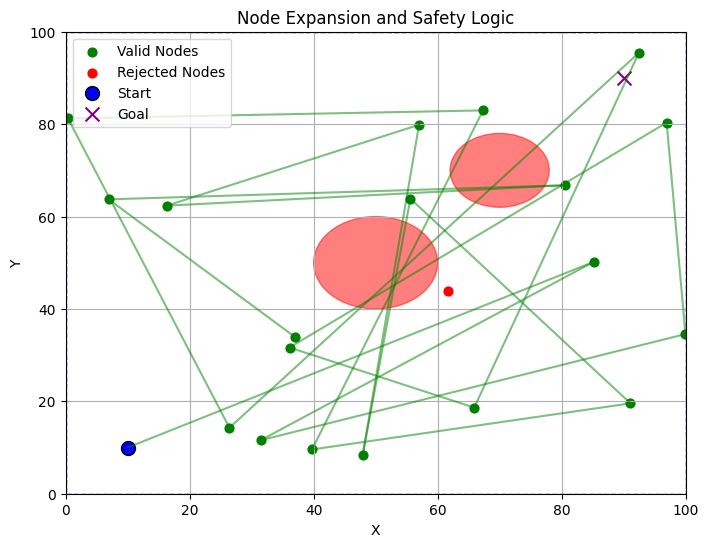

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.spatial import KDTree

# Create the environment
map_size = (100, 100)
start = np.array([10, 10])
goal = np.array([90, 90])
obstacles = [(50, 50, 10), (70, 70, 8)]  # (x, y, radius)
valid_nodes = [start]
rejected_nodes = []
expanded_nodes = [start]

# Function to check for collision with obstacles
def check_collision(a, b, obstacles):
    line = np.linspace(a, b, num=10)  # 10 intermediate points along the line
    for (ox, oy, r) in obstacles:
        for (px, py) in line:
            if np.hypot(px - ox, py - oy) < r:  # If point is inside the obstacle
                return True
    return False

# Function to simulate node expansion with KDTree
def nearest_neighbor(nodes, new_node):
    if not nodes:
        return None
    tree = KDTree(nodes)
    dist, idx = tree.query(new_node)
    return nodes[idx]

# Simulate the node expansion
for _ in range(20):
    new_node = np.random.rand(2) * 100
    nearest_node = nearest_neighbor(valid_nodes, new_node)
    
    if nearest_node is None:
        continue
    
    # Check if the edge between nearest_node and new_node is valid
    if check_collision(nearest_node, new_node, obstacles):
        rejected_nodes.append(new_node)
    else:
        valid_nodes.append(new_node)
    expanded_nodes.append(new_node)

# Convert lists to numpy arrays for plotting
valid_nodes = np.array(valid_nodes)
rejected_nodes = np.array(rejected_nodes)

# Plotting the environment
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Plot obstacles
for ox, oy, r in obstacles:
    circle = patches.Circle((ox, oy), r, color='red', alpha=0.5)
    ax.add_patch(circle)

# Plot nodes and edges
ax.scatter(valid_nodes[:, 0], valid_nodes[:, 1], color='green', label='Valid Nodes', s=40)
ax.scatter(rejected_nodes[:, 0], rejected_nodes[:, 1], color='red', label='Rejected Nodes', s=40)

# Plot the edges for valid nodes
for i in range(1, len(valid_nodes)):
    ax.plot([valid_nodes[i-1, 0], valid_nodes[i, 0]], [valid_nodes[i-1, 1], valid_nodes[i, 1]], 'g-', alpha=0.5)

# Plot the edges for rejected nodes (show dashed lines)
for i in range(1, len(rejected_nodes)):
    a = i-1
    ax.plot([expanded_nodes[a, 0], rejected_nodes[i, 0]], [expanded_nodes[a, 1], rejected_nodes[i, 1]], 'r--', alpha=0.5)

# Mark start and goal points
ax.scatter(start[0], start[1], color='blue', label='Start', s=100, edgecolor='black', marker='o')
ax.scatter(goal[0], goal[1], color='purple', label='Goal', s=100, edgecolor='black', marker='x')

# Display boundary control
boundary = patches.Rectangle((0, 0), 100, 100, linewidth=1, edgecolor='blue', facecolor='none', linestyle='--')
ax.add_patch(boundary)

# Add labels and title
ax.set_title("Node Expansion and Safety Logic")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)
ax.legend()

# Show plot
plt.show()

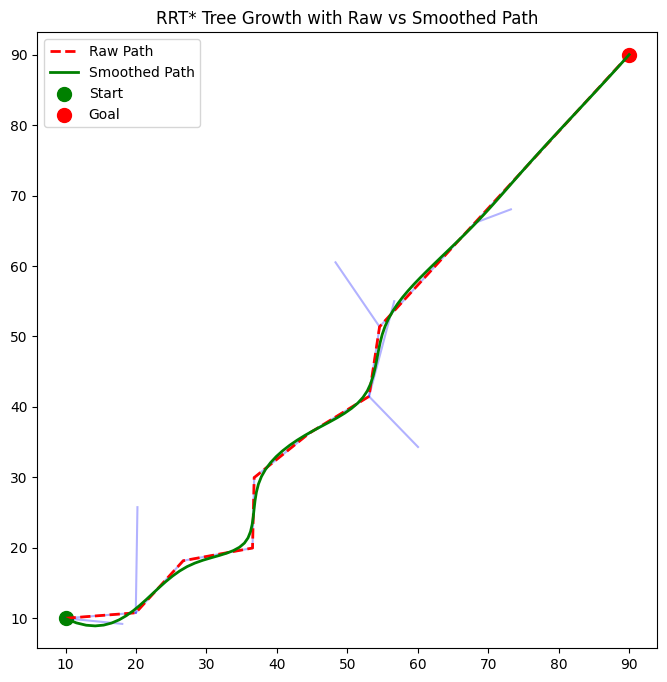

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
from scipy.interpolate import splprep, splev

np.random.seed(685)

# Configuration
step_size = 10
goal_radius = 10
max_iter = 500
area_bounds = (0, 100)

# Start and goal positions
start = np.array([10, 10])
goal = np.array([90, 90])

# Store nodes: [position, cost, parent_index]
nodes = [[start, 0.0, -1]]

def euclidean(a, b):
    return np.linalg.norm(a - b)

def steer(from_node, to_point):
    direction = to_point - from_node
    dist = np.linalg.norm(direction)
    direction = direction / dist
    dist = min(dist, step_size)
    return from_node + direction * dist

def sample():
    if np.random.rand() < 0.2:  # goal bias
        return goal
    return np.random.uniform(area_bounds[0], area_bounds[1], 2)

def extract_path():
    path = [goal]
    current = len(nodes) - 1
    while current != -1:
        path.append(nodes[current][0])
        current = nodes[current][2]
    return path[::-1]

def smooth_path(path):
    x, y = zip(*path)
    x, y = np.array(x), np.array(y)

    # Remove duplicate points
    coords = np.vstack((x, y)).T
    coords = np.unique(coords, axis=0)

    if len(coords) < 2:
        return x, y  # not enough to smooth

    x, y = coords[:, 0], coords[:, 1]
    k = min(3, len(x) - 1)  # reduce spline degree if points are too few

    try:
        tck, _ = splprep([x, y], s=5, k=k)
        u = np.linspace(0, 1, num=100)
        smooth = splev(u, tck)
        return smooth
    except Exception as e:
        print("Spline fitting failed:", e)
        return x, y  # fallback to raw


# Build tree
for _ in range(max_iter):
    rand = sample()
    kdtree = KDTree([n[0] for n in nodes])
    dist, idx = kdtree.query(rand)
    nearest = nodes[idx][0]
    new_pos = steer(nearest, rand)

    # Check if within goal
    if euclidean(new_pos, goal) < goal_radius:
        nodes.append([goal, nodes[idx][1] + euclidean(nearest, goal), idx])
        break

    # Rewiring
    nearby = kdtree.query_ball_point(new_pos, 15)
    costs = [nodes[i][1] + euclidean(nodes[i][0], new_pos) for i in nearby]
    best_idx = nearby[np.argmin(costs)]
    nodes.append([new_pos, costs[np.argmin(costs)], best_idx])

# Extract and smooth path
raw_path = extract_path()
smooth_x, smooth_y = smooth_path(raw_path)

# Plot
plt.figure(figsize=(8, 8))
for node in nodes:
    if node[2] != -1:
        parent = nodes[node[2]]
        plt.plot([node[0][0], parent[0][0]], [node[0][1], parent[0][1]], 'b-', alpha=0.3)

# Draw raw path
rx, ry = zip(*raw_path)
plt.plot(rx, ry, 'r--', label='Raw Path', linewidth=2)

# Draw smoothed path
plt.plot(smooth_x, smooth_y, 'g-', label='Smoothed Path', linewidth=2)

plt.scatter(*start, c='green', s=100, label='Start')
plt.scatter(*goal, c='red', s=100, label='Goal')
plt.legend()
plt.title("RRT* Tree Growth with Raw vs Smoothed Path")
plt.axis('equal')
plt.grid(False)
plt.show()
